In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.stats as stm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

In [2]:
permcrop5_df = pd.read_csv('../CSVs/Permanent_Crop_NUTS4_2019.csv', sep=",")
tempcrop5_df = pd.read_csv('../CSVs/Temporary_Crop_NUTS4_2019.csv', sep=",")
education5_df = pd.read_csv('../CSVs/Education_NUTS4_2019.csv', sep=",")
labour5_df = pd.read_csv('../CSVs/Labour_NUTS4_2019.csv', sep=",")
prod5_df = pd.read_csv('../CSVs/Production_NUTS4_2019.csv', sep=",")

In [92]:
labour5_df['l.value'].describe()

count    2772.000000
mean      340.416306
std       523.661443
min         0.000000
25%        41.000000
50%       145.500000
75%       411.250000
max      7237.000000
Name: l.value, dtype: float64

In [94]:
labour5_df.head()

,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour,NUTS2_region
0,1111601,Arcos de Valdevez,4,2019,2087,Total labour force in agriculture,Norte
1,1111601,Arcos de Valdevez,4,2019,1935,Family labour force,Norte
2,1111601,Arcos de Valdevez,4,2019,1046,Holder,Norte
3,1111601,Arcos de Valdevez,4,2019,626,Spouse,Norte
4,1111601,Arcos de Valdevez,4,2019,263,Other family members,Norte


In [103]:
value_count = labour5_df.loc[labour5_df['ltn.type_labour'] == 'Total labour force in agriculture', 
                             'l.value'].value_counts()
sorted(value_count.items(), key=lambda x: x[0])

[(8, 1),
 (11, 2),
 (20, 1),
 (21, 1),
 (22, 1),
 (32, 1),
 (34, 1),
 (45, 1),
 (48, 1),
 (49, 2),
 (52, 1),
 (63, 1),
 (70, 1),
 (76, 1),
 (91, 1),
 (103, 1),
 (109, 1),
 (111, 1),
 (129, 1),
 (136, 1),
 (138, 1),
 (142, 1),
 (159, 1),
 (162, 1),
 (166, 1),
 (168, 1),
 (174, 1),
 (189, 1),
 (195, 1),
 (201, 1),
 (206, 1),
 (218, 1),
 (221, 2),
 (225, 1),
 (228, 1),
 (240, 1),
 (244, 1),
 (249, 1),
 (250, 1),
 (253, 1),
 (254, 1),
 (258, 1),
 (261, 1),
 (264, 1),
 (270, 1),
 (272, 1),
 (282, 1),
 (283, 1),
 (284, 1),
 (301, 1),
 (307, 1),
 (319, 1),
 (320, 1),
 (324, 1),
 (331, 2),
 (334, 1),
 (336, 1),
 (344, 1),
 (349, 1),
 (351, 1),
 (359, 1),
 (364, 1),
 (365, 1),
 (369, 1),
 (378, 1),
 (381, 1),
 (382, 2),
 (387, 1),
 (388, 1),
 (394, 1),
 (395, 1),
 (407, 2),
 (415, 2),
 (416, 1),
 (433, 1),
 (436, 1),
 (441, 2),
 (452, 1),
 (459, 1),
 (462, 1),
 (464, 1),
 (468, 1),
 (486, 1),
 (488, 1),
 (493, 2),
 (499, 1),
 (504, 1),
 (522, 1),
 (526, 1),
 (531, 1),
 (532, 2),
 (545, 1),
 (55

In [93]:
education5_df['e.value'].describe()

count     1540.000000
mean       864.377922
std       1243.367639
min          0.000000
25%        146.000000
50%        365.000000
75%       1008.750000
max      10517.000000
Name: e.value, dtype: float64

In [3]:
permcrop5_df.head()

,NutsID,region_name,NUTS_level,pc.year,pc.area,pc.hold,pcn.crop_name
0,1111601,Arcos de Valdevez,4,2019,613,1271,Total
1,1111601,Arcos de Valdevez,4,2019,27,67,Fresh fruit plantations (excluding citrus plan...
2,1111601,Arcos de Valdevez,4,2019,5,55,Citrus plantations
3,1111601,Arcos de Valdevez,4,2019,3,12,Fruit plantations (subtropical climate zones)
4,1111601,Arcos de Valdevez,4,2019,90,129,Nuts plantations


In [4]:
prod5_df.head()

,NutsID,region_name,NUTS_level,p.year,p.value_eur,p.area_ha
0,1111601,Arcos de Valdevez,4,2019,11530051,551.5
1,1111602,Caminha,4,2019,3015466,1058.6
2,1111603,Melgaço,4,2019,5191947,494.9
3,1111604,Monção,4,2019,9358899,1577.4
4,1111605,Paredes de Coura,4,2019,5383718,1276.3


In [5]:
all_dfs = [permcrop5_df, tempcrop5_df, education5_df, labour5_df, prod5_df]

def map_value(value):
    digits = str(value)[:2]
    if digits == '11':
        return 'Norte'
    elif digits == '15':
        return 'Algarve'
    elif digits == '16':
        return 'Centro'
    elif digits == '17':
        return 'Lisboa'
    elif digits == '18':
        return 'Alentejo'
    elif digits == '20':
        return 'Açores'
    elif digits == '30':
        return 'Madeira'
    else:
        return '-'

for df in all_dfs:
    df['NUTS2_region'] = df['NutsID'].apply(map_value)
    print(df['NUTS2_region'].unique())

['Norte' 'Algarve' 'Centro' 'Lisboa' 'Alentejo' 'Açores' 'Madeira']
['Norte' 'Algarve' 'Centro' 'Lisboa' 'Alentejo' 'Açores' 'Madeira']
['Norte' 'Algarve' 'Centro' 'Lisboa' 'Alentejo' 'Açores' 'Madeira']
['Norte' 'Algarve' 'Centro' 'Lisboa' 'Alentejo' 'Açores' 'Madeira']
['Norte' 'Algarve' 'Centro' 'Lisboa' 'Alentejo' 'Açores' 'Madeira']


In [6]:
education5_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   NutsID              1540 non-null   object
 1   region_name         1540 non-null   object
 2   NUTS_level          1540 non-null   int64 
 3   e.year              1540 non-null   int64 
 4   e.value             1540 non-null   int64 
 5   el.education_level  1232 non-null   object
 6   NUTS2_region        1540 non-null   object
dtypes: int64(3), object(4)
memory usage: 84.3+ KB


In [7]:
prod5_df['NUTS2_region'].unique()

array(['Norte', 'Algarve', 'Centro', 'Lisboa', 'Alentejo', 'Açores',
       'Madeira'], dtype=object)

# Education

In [8]:
education5_df.head()

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,NUTS2_region
0,1111601,Arcos de Valdevez,4,2019,4512,Total,Norte
1,1111602,Caminha,4,2019,968,Total,Norte
2,1111603,Melgaço,4,2019,2360,Total,Norte
3,1111604,Monção,4,2019,4341,Total,Norte
4,1111605,Paredes de Coura,4,2019,1995,Total,Norte


In [9]:
education5_df['el.education_level'].fillna('None', inplace=True)

In [10]:
ed_no_totals = education5_df[education5_df['el.education_level'] != 'Total'].copy()
ed_totals = education5_df[education5_df['el.education_level'] == 'Total'].copy()

In [11]:
ed_totals.head()

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,NUTS2_region
0,1111601,Arcos de Valdevez,4,2019,4512,Total,Norte
1,1111602,Caminha,4,2019,968,Total,Norte
2,1111603,Melgaço,4,2019,2360,Total,Norte
3,1111604,Monção,4,2019,4341,Total,Norte
4,1111605,Paredes de Coura,4,2019,1995,Total,Norte


In [12]:
def ed_percentage(row):
    id = row['NutsID']
    value = row['e.value']
    total = ed_totals[ed_totals['NutsID'] == id]['e.value'].values[0]
    if total == 0:
        return None
    else:
        return round((value / total) * 100, 2)

In [13]:
ed_no_totals.loc[:, 'ed_level_perc'] = ed_no_totals.apply(ed_percentage, axis=1)

In [14]:
ed_no_totals.head()

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,NUTS2_region,ed_level_perc
308,1111601,Arcos de Valdevez,4,2019,902,None,Norte,19.99
309,1111602,Caminha,4,2019,141,None,Norte,14.57
310,1111603,Melgaço,4,2019,346,None,Norte,14.66
311,1111604,Monção,4,2019,616,None,Norte,14.19
312,1111605,Paredes de Coura,4,2019,323,None,Norte,16.19


In [15]:
ed_no_totals['ed_level_perc'].isna().value_counts()

ed_level_perc
False    1232
Name: count, dtype: int64

In [16]:
nuts2_order = ['Norte', 'Centro', 'Lisboa', 'Alentejo', 'Algarve', 'Açores', 'Madeira']

In [17]:
education_order = ['None', 'Basic', 'Secondary / post-secondary', 'Superior']

In [18]:
ed_no_total_graph = ed_no_totals.copy()

In [19]:
# Convert the column to a categorical type with the custom order
ed_no_total_graph['NUTS2_region'] = pd.Categorical(ed_no_total_graph['NUTS2_region'], 
                                                   categories=nuts2_order, 
                                                   ordered=True)
ed_no_total_graph['el.education_level'] = pd.Categorical(ed_no_total_graph['el.education_level'], 
                                                         categories=education_order, 
                                                         ordered=True)

In [20]:
# Sort the DataFrame by the custom order
ed_no_total_graph = ed_no_total_graph.sort_values(['NUTS2_region', 'el.education_level']).reset_index(drop=True)

In [106]:
region_colors = {
    'Alentejo': '#FF69B4',  # pink
    'Norte': '#32CD32',  # green
    'Centro': '#6495ED',  # blue
    'Açores': '#FFD700',  # yellow
    'Algarve': '#8B0A1A',  # red
    'Lisboa': '#4682B4',  # light blue
    'Madeira': '#9ACD32'  # light green
}

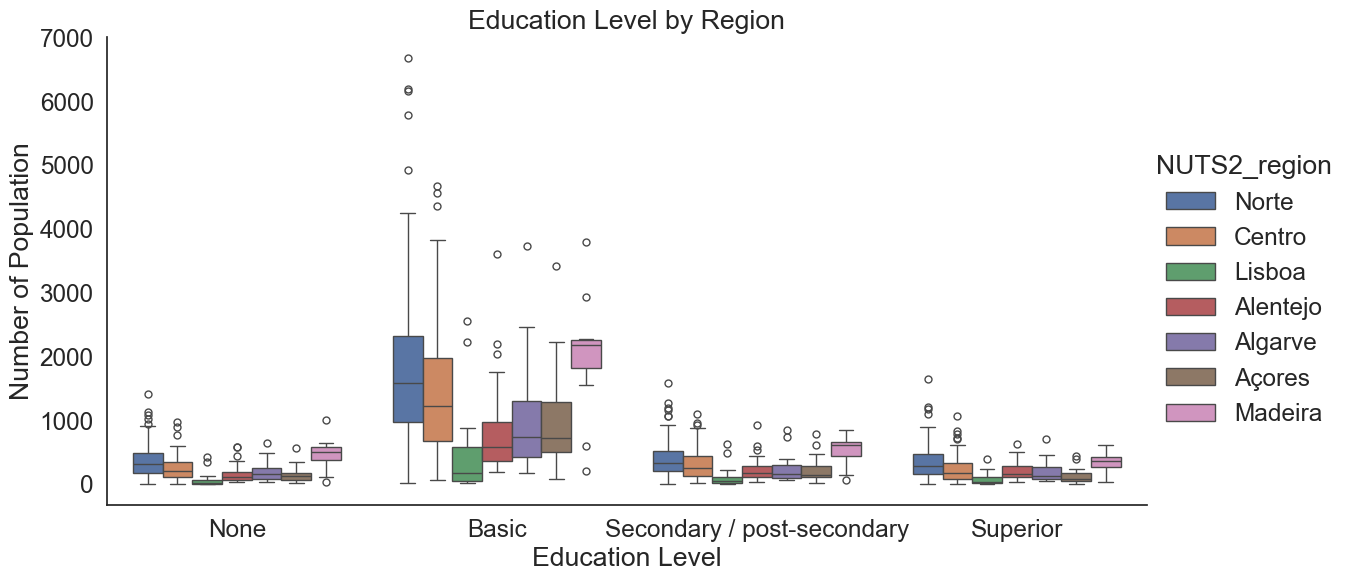

In [111]:
sns.catplot(
    data=ed_no_total_graph,
    x="el.education_level",
    y="e.value",
    hue="NUTS2_region",
    kind="box",
    height=6,
    aspect=2
)
plt.title('Education Level by Region')
plt.xlabel('Education Level')
plt.ylabel('Number of Population')
plt.show()

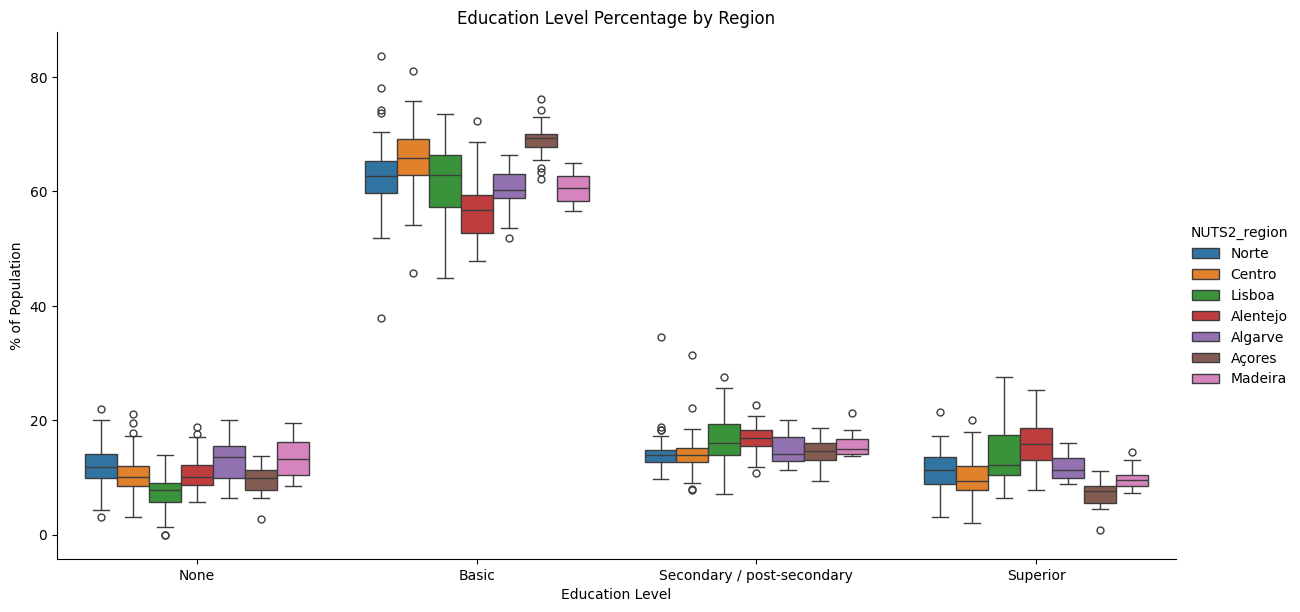

In [22]:
sns.catplot(
    data=ed_no_total_graph,
    x="el.education_level",
    y="ed_level_perc",
    hue="NUTS2_region",
    kind="box",
    height=6,
    aspect=2
)
plt.title('Education Level Percentage by Region')
plt.xlabel('Education Level')
plt.ylabel('% of Population')
plt.show()

In [23]:
ed_no_totals[ed_no_totals['NUTS2_region'] == 'Lisboa'].describe()

,NUTS_level,e.year,e.value,ed_level_perc
count,72.0,72.0,72.000000,72.00000
mean,4.0,2019.0,187.847222,25.00000
std,0.0,0.0,419.796619,22.38171
min,4.0,2019.0,0.000000,0.00000
25%,4.0,2019.0,12.750000,9.43750
50%,4.0,2019.0,49.500000,14.74500
75%,4.0,2019.0,142.000000,31.90000
max,4.0,2019.0,2557.000000,73.61000


In [24]:
ed_none_basic = ed_no_totals[ed_no_totals['el.education_level'].isin(['None', 'Basic'])]
ed_nb_sum = ed_none_basic.groupby(['NutsID', 'NUTS2_region'])['ed_level_perc'].sum().reset_index()
ed_nb_sum.rename(columns={'ed_level_perc': 'none_basic_perc'}, inplace=True)

In [25]:
ed_nb_sum.describe()

,none_basic_perc
count,308.000000
mean,73.547792
std,6.481686
min,44.830000
25%,69.942500
50%,74.550000
75%,78.012500
max,90.030000


/var/folders/1m/rgp5yf6d1w35tspjx1fqpbvr0000gn/T/ipykernel_67061/1617152328.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


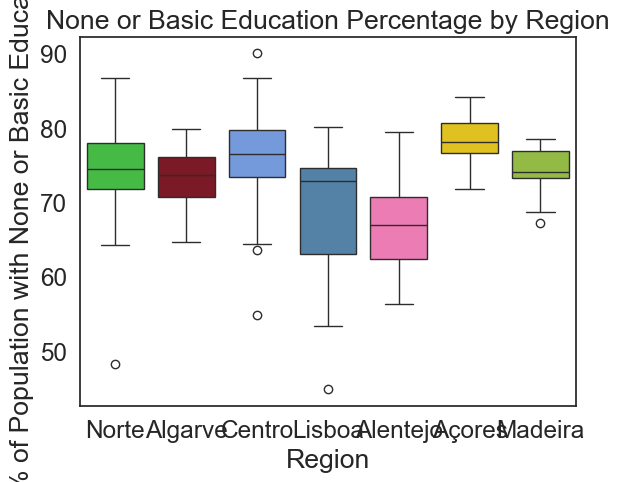

In [108]:
sns.boxplot(
    data=ed_nb_sum,
    x="NUTS2_region",
    y="none_basic_perc",
    hue="NUTS2_region"
)
plt.title('None or Basic Education Percentage by Region')
plt.xlabel('Region')
plt.ylabel('% of Population with None or Basic Education')
plt.show()

In [27]:
ed_nb_region_medians = ed_nb_sum.groupby('NUTS2_region')['none_basic_perc'].median().reset_index()
ed_nb_region_medians

,NUTS2_region,none_basic_perc
0,Alentejo,66.895
1,Algarve,73.650
2,Açores,78.070
3,Centro,76.470
4,Lisboa,72.845
5,Madeira,74.120
6,Norte,74.510


In [28]:
ed_nb_region_means = ed_nb_sum.groupby('NUTS2_region')['none_basic_perc'].mean().reset_index()
ed_nb_region_means

,NUTS2_region,none_basic_perc
0,Alentejo,67.422759
1,Algarve,73.235625
2,Açores,78.418421
3,Centro,76.130800
4,Lisboa,68.744444
5,Madeira,74.165455
6,Norte,74.583488


In [29]:
ed_no_totals.head()

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,NUTS2_region,ed_level_perc
308,1111601,Arcos de Valdevez,4,2019,902,None,Norte,19.99
309,1111602,Caminha,4,2019,141,None,Norte,14.57
310,1111603,Melgaço,4,2019,346,None,Norte,14.66
311,1111604,Monção,4,2019,616,None,Norte,14.19
312,1111605,Paredes de Coura,4,2019,323,None,Norte,16.19


In [30]:
ed_secondary_plus = ed_no_totals[ed_no_totals['el.education_level'].isin(['Secondary / post-secondary', 'Superior'])]
ed_sp_sum = ed_secondary_plus.groupby(['NutsID', 'region_name', 'NUTS2_region'])['ed_level_perc'].sum().reset_index()
ed_sp_sum.rename(columns={'ed_level_perc': 'secondary_plus_perc'}, inplace=True)

In [31]:
ed_sp_sum.describe()

,secondary_plus_perc
count,308.000000
mean,26.452078
std,6.481429
min,9.980000
25%,21.995000
50%,25.445000
75%,30.057500
max,55.180000


In [32]:
ed_no_totals[ed_no_totals['region_name'] == 'Aboim das Choças']

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,NUTS2_region,ed_level_perc


In [33]:
ed_split_perc = ed_sp_sum

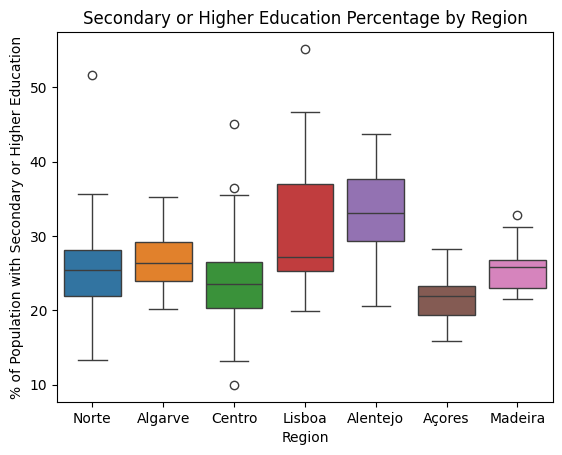

In [34]:
sns.boxplot(
    data=ed_sp_sum,
    x="NUTS2_region",
    y="secondary_plus_perc",
    hue="NUTS2_region"
)
plt.title('Secondary or Higher Education Percentage by Region')
plt.xlabel('Region')
plt.ylabel('% of Population with Secondary or Higher Education')
plt.show()

In [35]:
ed_all_ed_levels = ed_no_totals.loc[:, ['NutsID', 'region_name', 'el.education_level', 'ed_level_perc', 'NUTS2_region']]

In [36]:
ed_all_ed_levels

,NutsID,region_name,el.education_level,ed_level_perc,NUTS2_region
308,1111601,Arcos de Valdevez,None,19.99,Norte
309,1111602,Caminha,None,14.57,Norte
310,1111603,Melgaço,None,14.66,Norte
311,1111604,Monção,None,14.19,Norte
312,1111605,Paredes de Coura,None,16.19,Norte
...,...,...,...,...,...
1535,3003107,Ribeira Brava,Superior,7.35,Madeira
1536,3003108,Santa Cruz,Superior,9.95,Madeira
1537,3003109,Santana,Superior,9.63,Madeira
1538,3003110,São Vicente,Superior,9.66,Madeira


In [37]:
ed_split_perc

,NutsID,region_name,NUTS2_region,secondary_plus_perc
0,1111601,Arcos de Valdevez,Norte,18.55
1,1111602,Caminha,Norte,20.56
2,1111603,Melgaço,Norte,26.19
3,1111604,Monção,Norte,25.64
4,1111605,Paredes de Coura,Norte,18.44
...,...,...,...,...
303,3003107,Ribeira Brava,Madeira,22.28
304,3003108,Santa Cruz,Madeira,31.25
305,3003109,Santana,Madeira,25.88
306,3003110,São Vicente,Madeira,23.86


# Labour

In [38]:
labour5_df.head(10)

,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour,NUTS2_region
0,1111601,Arcos de Valdevez,4,2019,2087,Total labour force in agriculture,Norte
1,1111601,Arcos de Valdevez,4,2019,1935,Family labour force,Norte
2,1111601,Arcos de Valdevez,4,2019,1046,Holder,Norte
3,1111601,Arcos de Valdevez,4,2019,626,Spouse,Norte
4,1111601,Arcos de Valdevez,4,2019,263,Other family members,Norte
5,1111601,Arcos de Valdevez,4,2019,152,Non-family labour force,Norte
6,1111601,Arcos de Valdevez,4,2019,75,Regular,Norte
7,1111601,Arcos de Valdevez,4,2019,65,Non-regular,Norte
8,1111601,Arcos de Valdevez,4,2019,11,Workers not hired by the holder,Norte
9,1111602,Caminha,4,2019,407,Total labour force in agriculture,Norte


In [39]:
lab_no_totals = labour5_df[labour5_df['ltn.type_labour'] != 'Total labour force in agriculture'].copy()
lab_totals = labour5_df[(labour5_df['ltn.type_labour'] == 'Family labour force') |
                        (labour5_df['ltn.type_labour'] == 'Non-family labour force')].copy()
lab_split_totals = labour5_df[(labour5_df['ltn.type_labour'] != 'Total labour force in agriculture') & 
                              (labour5_df['ltn.type_labour'] != 'Family labour force') &
                              (labour5_df['ltn.type_labour'] != 'Non-family labour force')].copy()

In [40]:
lab_totals = lab_totals.groupby(['NutsID', 'region_name', 'NUTS2_region'])['l.value'].sum().reset_index()
lab_split_totals = lab_split_totals.groupby(['NutsID', 'region_name', 'NUTS2_region'])['l.value'].sum().reset_index()

In [41]:
def lab_percentage(row):
    if (row['ltn.type_labour'] == 'Family labour force') or (row['ltn.type_labour'] == 'Non-family labour force'):
        id = row['NutsID']
        value = row['l.value']
        total = lab_totals[lab_totals['NutsID'] == id]['l.value'].values[0]
    else:
        id = row['NutsID']
        value = row['l.value']
        total = lab_split_totals[lab_split_totals['NutsID'] == id]['l.value'].values[0]
    if total == 0:
        return None
    else:
        return round((value / total) * 100, 2)

In [42]:
lab_no_totals.loc[:, 'lab_level_perc'] = lab_no_totals.apply(lab_percentage, axis=1)

In [43]:
lab_nonfam = lab_no_totals[lab_no_totals['ltn.type_labour'] == 'Non-family labour force'].copy()

In [44]:
lab_no_totals.head(30)

,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour,NUTS2_region,lab_level_perc
1,1111601,Arcos de Valdevez,4,2019,1935,Family labour force,Norte,92.72
2,1111601,Arcos de Valdevez,4,2019,1046,Holder,Norte,50.14
3,1111601,Arcos de Valdevez,4,2019,626,Spouse,Norte,30.01
4,1111601,Arcos de Valdevez,4,2019,263,Other family members,Norte,12.61
5,1111601,Arcos de Valdevez,4,2019,152,Non-family labour force,Norte,7.28
6,1111601,Arcos de Valdevez,4,2019,75,Regular,Norte,3.60
7,1111601,Arcos de Valdevez,4,2019,65,Non-regular,Norte,3.12
8,1111601,Arcos de Valdevez,4,2019,11,Workers not hired by the holder,Norte,0.53
10,1111602,Caminha,4,2019,326,Family labour force,Norte,80.10
11,1111602,Caminha,4,2019,159,Holder,Norte,38.97


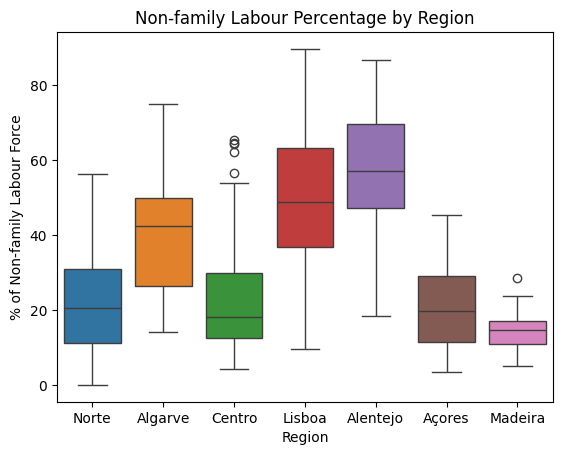

In [45]:
sns.boxplot(
    data=lab_nonfam,
    x="NUTS2_region",
    y="lab_level_perc",
    hue="NUTS2_region"
)
plt.title('Non-family Labour Percentage by Region')
plt.xlabel('Region')
plt.ylabel('% of Non-family Labour Force')
plt.show()

In [46]:
lab_split_perc = lab_nonfam.loc[:, ['NutsID', 'region_name', 'NUTS2_region', 'lab_level_perc']]
lab_split_perc.rename(columns={'lab_level_perc': 'non_family_perc'}, inplace=True)
lab_split_perc

,NutsID,region_name,NUTS2_region,non_family_perc
5,1111601,Arcos de Valdevez,Norte,7.28
14,1111602,Caminha,Norte,19.90
23,1111603,Melgaço,Norte,10.32
32,1111604,Monção,Norte,12.14
41,1111605,Paredes de Coura,Norte,5.84
...,...,...,...,...
2732,3003107,Ribeira Brava,Madeira,16.20
2741,3003108,Santa Cruz,Madeira,14.55
2750,3003109,Santana,Madeira,10.95
2759,3003110,São Vicente,Madeira,9.20


# Production

In [47]:
prod5_df.head()

,NutsID,region_name,NUTS_level,p.year,p.value_eur,p.area_ha,NUTS2_region
0,1111601,Arcos de Valdevez,4,2019,11530051,551.5,Norte
1,1111602,Caminha,4,2019,3015466,1058.6,Norte
2,1111603,Melgaço,4,2019,5191947,494.9,Norte
3,1111604,Monção,4,2019,9358899,1577.4,Norte
4,1111605,Paredes de Coura,4,2019,5383718,1276.3,Norte


In [48]:
prod5_df.isna().sum()

NutsID          0
region_name     0
NUTS_level      0
p.year          0
p.value_eur     0
p.area_ha       0
NUTS2_region    0
dtype: int64

<Axes: xlabel='NUTS2_region', ylabel='p.value_eur'>

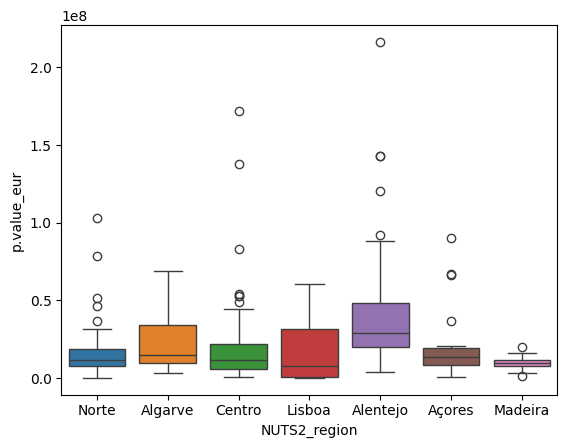

In [49]:
sns.boxplot(
    data=prod5_df,
    x="NUTS2_region",
    y="p.value_eur",
    hue="NUTS2_region"
)

<Axes: xlabel='NUTS2_region', ylabel='p.area_ha'>

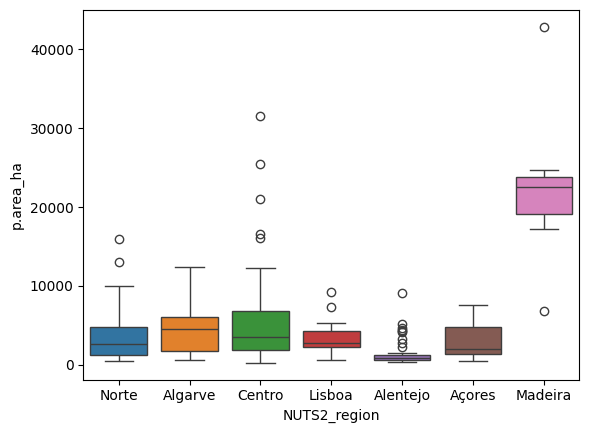

In [50]:
sns.boxplot(
    data=prod5_df,
    x="NUTS2_region",
    y="p.area_ha",
    hue="NUTS2_region"
)

In [51]:
prod5_df.head()

,NutsID,region_name,NUTS_level,p.year,p.value_eur,p.area_ha,NUTS2_region
0,1111601,Arcos de Valdevez,4,2019,11530051,551.5,Norte
1,1111602,Caminha,4,2019,3015466,1058.6,Norte
2,1111603,Melgaço,4,2019,5191947,494.9,Norte
3,1111604,Monção,4,2019,9358899,1577.4,Norte
4,1111605,Paredes de Coura,4,2019,5383718,1276.3,Norte


In [52]:
prod_amounts = prod5_df.loc[:, ['NutsID', 'region_name', 'NUTS2_region', 'p.value_eur', 'p.area_ha']]
prod_amounts

,NutsID,region_name,NUTS2_region,p.value_eur,p.area_ha
0,1111601,Arcos de Valdevez,Norte,11530051,551.5
1,1111602,Caminha,Norte,3015466,1058.6
2,1111603,Melgaço,Norte,5191947,494.9
3,1111604,Monção,Norte,9358899,1577.4
4,1111605,Paredes de Coura,Norte,5383718,1276.3
...,...,...,...,...,...
303,3003107,Ribeira Brava,Madeira,7273488,18408.3
304,3003108,Santa Cruz,Madeira,19846180,42876.4
305,3003109,Santana,Madeira,15924669,22574.1
306,3003110,São Vicente,Madeira,8351159,23241.6


# Permanent Crops

In [53]:
permcrop5_df.head()

,NutsID,region_name,NUTS_level,pc.year,pc.area,pc.hold,pcn.crop_name,NUTS2_region
0,1111601,Arcos de Valdevez,4,2019,613,1271,Total,Norte
1,1111601,Arcos de Valdevez,4,2019,27,67,Fresh fruit plantations (excluding citrus plan...,Norte
2,1111601,Arcos de Valdevez,4,2019,5,55,Citrus plantations,Norte
3,1111601,Arcos de Valdevez,4,2019,3,12,Fruit plantations (subtropical climate zones),Norte
4,1111601,Arcos de Valdevez,4,2019,90,129,Nuts plantations,Norte


In [54]:
permcrop5_df.isna().sum()

NutsID           0
region_name      0
NUTS_level       0
pc.year          0
pc.area          0
pc.hold          0
pcn.crop_name    0
NUTS2_region     0
dtype: int64

In [55]:
permcrop5_df['pc.avg_area_hold'] = round(permcrop5_df['pc.area'] / permcrop5_df['pc.hold'], 3)

In [56]:
permcrop_total = permcrop5_df[permcrop5_df['pcn.crop_name'] == 'Total'].copy()

In [57]:
permcrop_total.head()

,NutsID,region_name,NUTS_level,pc.year,pc.area,pc.hold,pcn.crop_name,NUTS2_region,pc.avg_area_hold
0,1111601,Arcos de Valdevez,4,2019,613,1271,Total,Norte,0.482
8,1111602,Caminha,4,2019,73,228,Total,Norte,0.320
16,1111603,Melgaço,4,2019,719,746,Total,Norte,0.964
24,1111604,Monção,4,2019,1725,1568,Total,Norte,1.100
32,1111605,Paredes de Coura,4,2019,76,289,Total,Norte,0.263


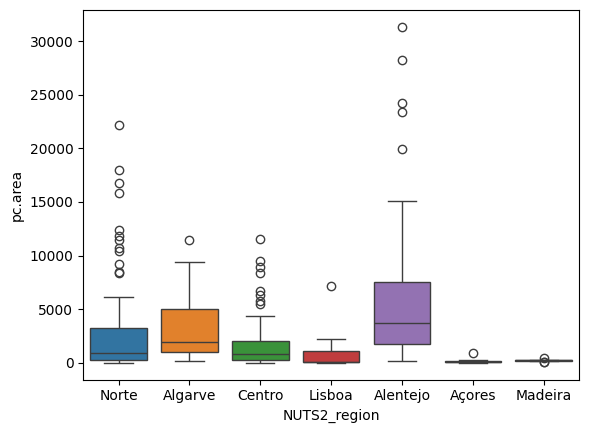

In [58]:
sns.boxplot(
    data=permcrop_total,
    x="NUTS2_region",
    y="pc.area",
    hue="NUTS2_region"
)
# plt.ylim(0, 3500)
plt.show()

<Axes: xlabel='NUTS2_region', ylabel='pc.hold'>

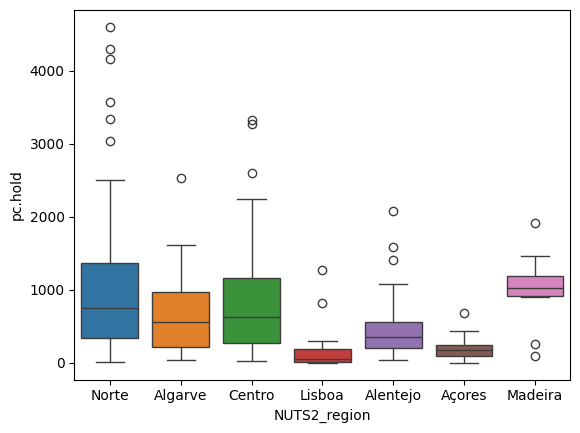

In [59]:
sns.boxplot(
    data=permcrop_total,
    x="NUTS2_region",
    y="pc.hold",
    hue="NUTS2_region"
)

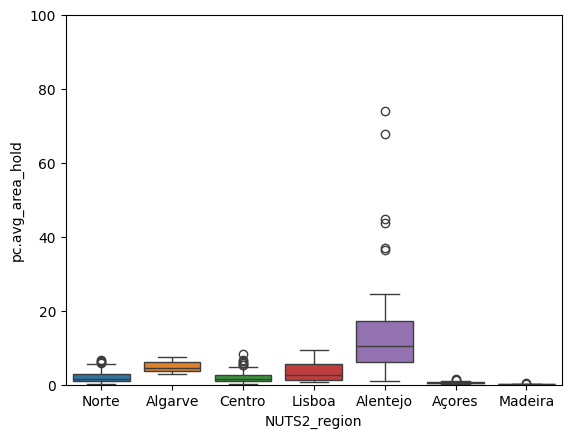

In [60]:
sns.boxplot(
    data=permcrop_total,
    x="NUTS2_region",
    y="pc.avg_area_hold",
    hue="NUTS2_region"
)
plt.ylim(0, 100)
plt.show()

In [61]:
permcrop_amounts = permcrop_total.loc[:, ['NutsID', 
                                          'region_name', 
                                          'NUTS2_region', 
                                          'pc.area', 
                                          'pc.hold', 
                                          'pc.avg_area_hold']]
permcrop_amounts

,NutsID,region_name,NUTS2_region,pc.area,pc.hold,pc.avg_area_hold
0,1111601,Arcos de Valdevez,Norte,613,1271,0.482
8,1111602,Caminha,Norte,73,228,0.320
16,1111603,Melgaço,Norte,719,746,0.964
24,1111604,Monção,Norte,1725,1568,1.100
32,1111605,Paredes de Coura,Norte,76,289,0.263
...,...,...,...,...,...,...
2424,3003107,Ribeira Brava,Madeira,215,1058,0.203
2432,3003108,Santa Cruz,Madeira,183,1165,0.157
2440,3003109,Santana,Madeira,255,1027,0.248
2448,3003110,São Vicente,Madeira,225,902,0.249


# Temporary Crops

In [62]:
tempcrop5_df.head()

,NutsID,region_name,NUTS_level,tc.year,tc.area,tc.hold,tcn.crop_name,NUTS2_region
0,1111601,Arcos de Valdevez,4,2019,962,1142,Total,Norte
1,1111601,Arcos de Valdevez,4,2019,301,865,Cereals,Norte
2,1111601,Arcos de Valdevez,4,2019,12,114,Dried pulses,Norte
3,1111601,Arcos de Valdevez,4,2019,194,227,Temporary grasses and grazings,Norte
4,1111601,Arcos de Valdevez,4,2019,422,553,Fodder plants,Norte


In [63]:
tempcrop5_df.isna().sum()

NutsID           0
region_name      0
NUTS_level       0
tc.year          0
tc.area          0
tc.hold          0
tcn.crop_name    0
NUTS2_region     0
dtype: int64

In [64]:
tempcrop5_df['tc.avg_area_hold'] = round(tempcrop5_df['tc.area'] / tempcrop5_df['tc.hold'], 3)

In [65]:
tempcrop_total = tempcrop5_df[tempcrop5_df['tcn.crop_name'] == 'Total'].copy()
tempcrop_total.head()

,NutsID,region_name,NUTS_level,tc.year,tc.area,tc.hold,tcn.crop_name,NUTS2_region,tc.avg_area_hold
0,1111601,Arcos de Valdevez,4,2019,962,1142,Total,Norte,0.842
11,1111602,Caminha,4,2019,300,291,Total,Norte,1.031
22,1111603,Melgaço,4,2019,96,347,Total,Norte,0.277
33,1111604,Monção,4,2019,638,905,Total,Norte,0.705
44,1111605,Paredes de Coura,4,2019,1265,588,Total,Norte,2.151


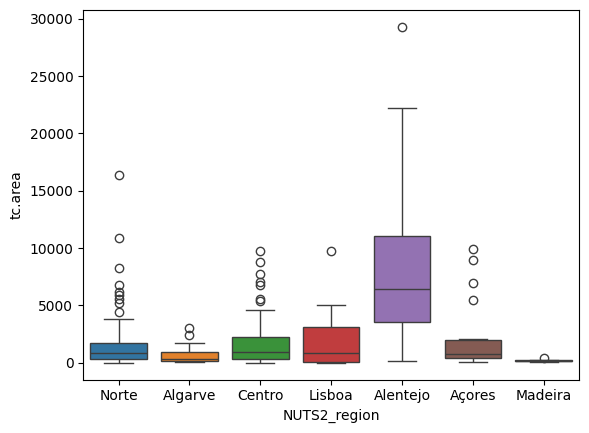

In [67]:
sns.boxplot(
    data=tempcrop_total,
    x="NUTS2_region",
    y="tc.area",
    hue="NUTS2_region"
)
# plt.ylim(0, 5000)
plt.show()

<Axes: xlabel='NUTS2_region', ylabel='tc.hold'>

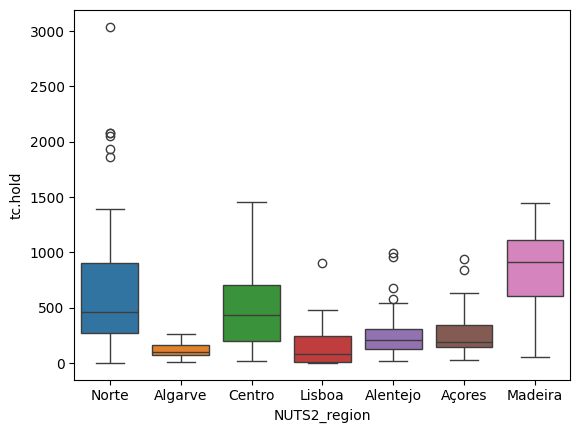

In [68]:
sns.boxplot(
    data=tempcrop_total,
    x="NUTS2_region",
    y="tc.hold",
    hue="NUTS2_region"
)

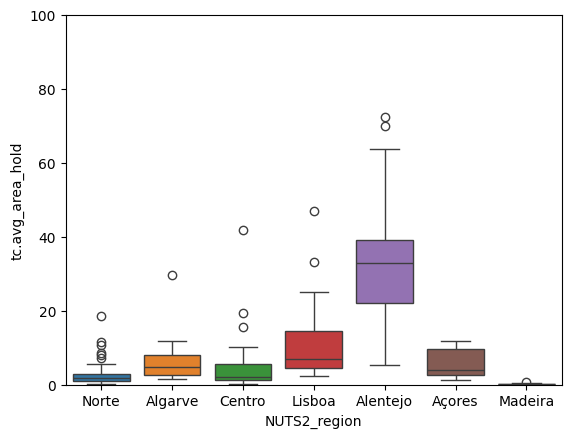

In [69]:
sns.boxplot(
    data=tempcrop_total,
    x="NUTS2_region",
    y="tc.avg_area_hold",
    hue="NUTS2_region"
)
plt.ylim(0, 100)
plt.show()

In [70]:
tempcrop_amounts = tempcrop_total.loc[:, ['NutsID', 
                                          'region_name', 
                                          'NUTS2_region', 
                                          'tc.area', 
                                          'tc.hold', 
                                          'tc.avg_area_hold']]
tempcrop_amounts

,NutsID,region_name,NUTS2_region,tc.area,tc.hold,tc.avg_area_hold
0,1111601,Arcos de Valdevez,Norte,962,1142,0.842
11,1111602,Caminha,Norte,300,291,1.031
22,1111603,Melgaço,Norte,96,347,0.277
33,1111604,Monção,Norte,638,905,0.705
44,1111605,Paredes de Coura,Norte,1265,588,2.151
...,...,...,...,...,...,...
3333,3003107,Ribeira Brava,Madeira,167,985,0.170
3344,3003108,Santa Cruz,Madeira,248,1076,0.230
3355,3003109,Santana,Madeira,448,1332,0.336
3366,3003110,São Vicente,Madeira,194,880,0.220


# Merging dataframes

In [71]:
df_merged = ed_split_perc.merge(lab_split_perc[['NutsID', 'non_family_perc']], on='NutsID')
df_merged = df_merged.merge(prod_amounts[['NutsID', 'p.value_eur', 'p.area_ha']], on='NutsID', how='left')
df_merged = df_merged.merge(permcrop_amounts[['NutsID', 'pc.area', 'pc.hold', 'pc.avg_area_hold']], on='NutsID')
df_merged = df_merged.merge(tempcrop_amounts[['NutsID', 'tc.area', 'tc.hold', 'tc.avg_area_hold']], on='NutsID')

In [72]:
df_merged

,NutsID,region_name,NUTS2_region,secondary_plus_perc,non_family_perc,p.value_eur,p.area_ha,pc.area,pc.hold,pc.avg_area_hold,tc.area,tc.hold,tc.avg_area_hold
0,1111601,Arcos de Valdevez,Norte,18.55,7.28,11530051,551.5,613,1271,0.482,962,1142,0.842
1,1111602,Caminha,Norte,20.56,19.90,3015466,1058.6,73,228,0.320,300,291,1.031
2,1111603,Melgaço,Norte,26.19,10.32,5191947,494.9,719,746,0.964,96,347,0.277
3,1111604,Monção,Norte,25.64,12.14,9358899,1577.4,1725,1568,1.100,638,905,0.705
4,1111605,Paredes de Coura,Norte,18.44,5.84,5383718,1276.3,76,289,0.263,1265,588,2.151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,3003107,Ribeira Brava,Madeira,22.28,16.20,7273488,18408.3,215,1058,0.203,167,985,0.170
304,3003108,Santa Cruz,Madeira,31.25,14.55,19846180,42876.4,183,1165,0.157,248,1076,0.230
305,3003109,Santana,Madeira,25.88,10.95,15924669,22574.1,255,1027,0.248,448,1332,0.336
306,3003110,São Vicente,Madeira,23.86,9.20,8351159,23241.6,225,902,0.249,194,880,0.220


# PCA

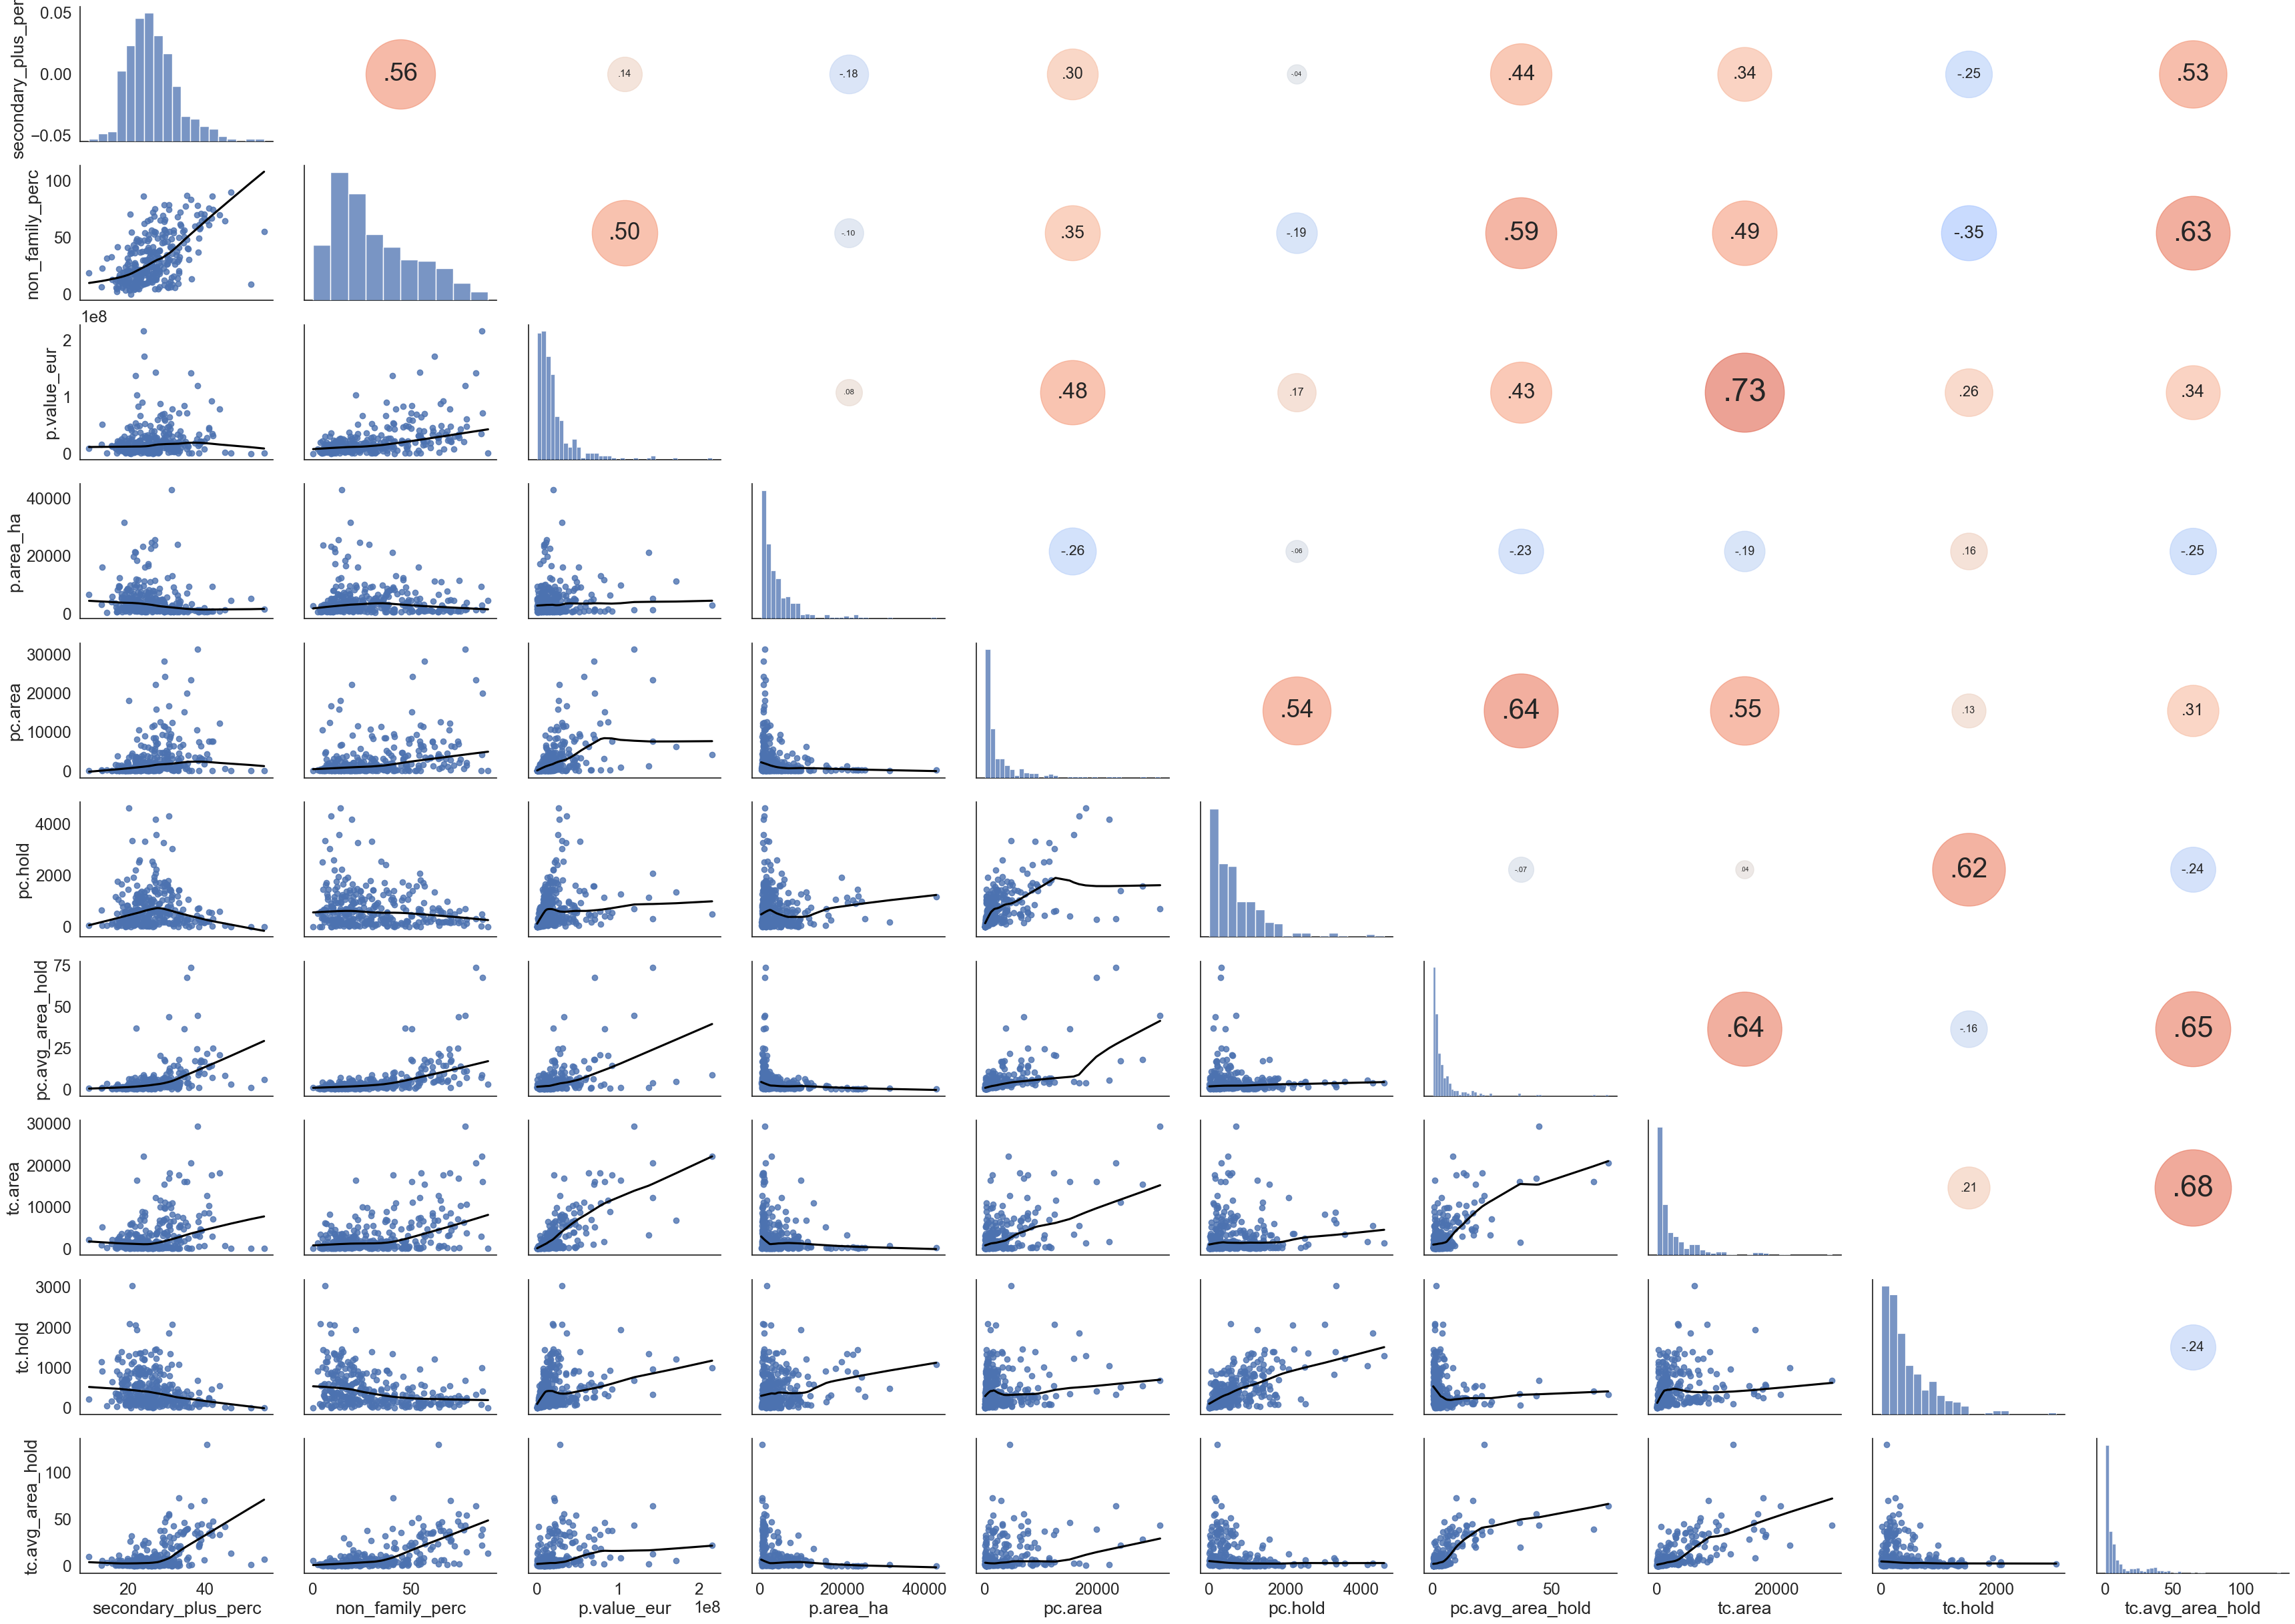

In [104]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)

g = sns.PairGrid(df_merged, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.histplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

In [74]:
df_merged_nona = df_merged.dropna()

In [75]:
df_scaled = StandardScaler().fit_transform(df_merged_nona.iloc[:, 3:])

pca = PCA(n_components=2)
PC = pca.fit_transform(df_scaled)

In [76]:
def biplot(score,coef,hue,labels=None): 
 
    xs = score[:,0] # PC1 object scores
    ys = score[:,1] # PC2 object scores 
    n = coef.shape[0] # number of dimensions (2)
    scalex = 1.0/(xs.max() - xs.min()) # to rescale scores
    scaley = 1.0/(ys.max() - ys.min()) # to rescale scores
    sns.scatterplot(x=xs * scalex,
                    y=ys * scaley,
                    hue=hue,
                    s=8, 
                    color='blue') # scatter plot using rescaled object scores
 
    for i in range(n):
        plt.arrow(0, 0, coef[i,0], 
                  coef[i,1],color = 'red',
                  head_width=0.01,
                  alpha = 0.5) # plot arrows for each variable
        plt.text(coef[i,0]* 1.15, 
                 coef[i,1] * 1.15, 
                 labels[i], 
                 color = 'red', 
                 ha = 'center', 
                 va = 'center',
                 fontsize = 'xx-small') # variable labels for each arrow

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))    
 
 
    plt.figure()

In [77]:
df_merged_nona.columns

Index(['NutsID', 'region_name', 'NUTS2_region', 'secondary_plus_perc',
       'non_family_perc', 'p.value_eur', 'p.area_ha', 'pc.area', 'pc.hold',
       'pc.avg_area_hold', 'tc.area', 'tc.hold', 'tc.avg_area_hold'],
      dtype='object')

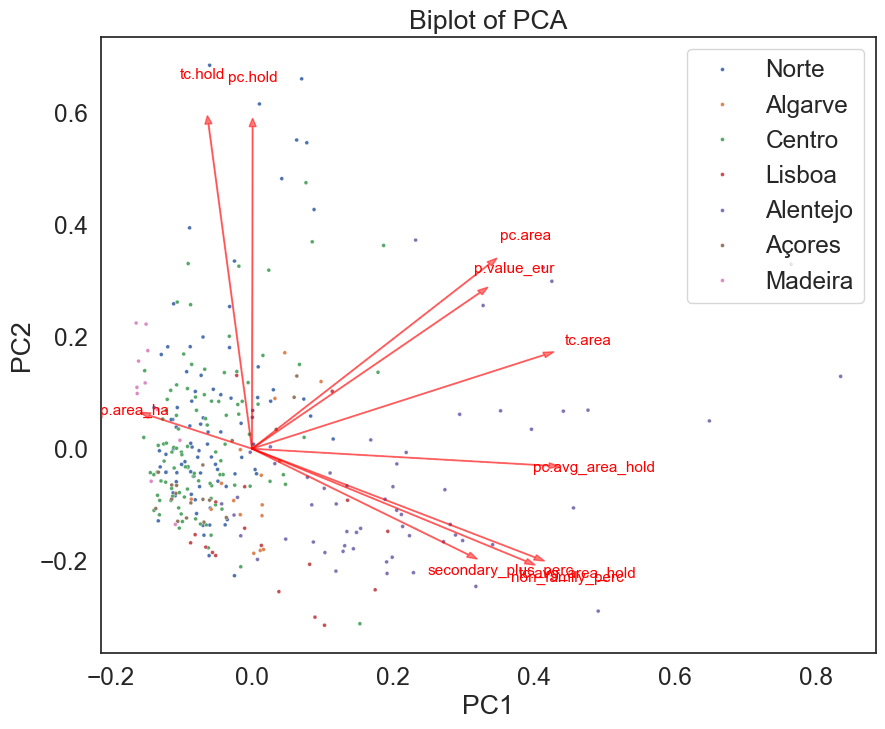

<Figure size 640x480 with 0 Axes>

In [78]:
plt.figure(figsize=(10, 8))
plt.title('Biplot of PCA')
 
biplot(PC, 
       np.transpose(pca.components_), 
       df_merged_nona['NUTS2_region'].tolist(),
       list(df_merged_nona.columns[3:]))
plt.show()

In [79]:
# scree plot

df_scree = df_merged_nona.iloc[:, 3:]

scree_scaled = StandardScaler().fit_transform(df_scree)
df_scree_scaled = pd.DataFrame(data=scree_scaled, columns=df_scree.columns)
df_scree_scaled.head()

,secondary_plus_perc,non_family_perc,p.value_eur,p.area_ha,pc.area,pc.hold,pc.avg_area_hold,tc.area,tc.hold,tc.avg_area_hold
0,-1.228044,-1.143437,-0.390790,-0.711022,-0.485846,0.750530,-0.499255,-0.457545,1.577891,-0.592633
1,-0.916872,-0.534030,-0.708206,-0.616190,-0.605619,-0.661152,-0.519223,-0.614351,-0.378639,-0.580171
2,-0.045279,-0.996638,-0.627069,-0.721607,-0.462335,0.039952,-0.439844,-0.662672,-0.249890,-0.629885
3,-0.130426,-0.908752,-0.471729,-0.519171,-0.239201,1.152514,-0.423080,-0.534290,1.033006,-0.601665
4,-1.245074,-1.212973,-0.619920,-0.575479,-0.604954,-0.578589,-0.526249,-0.385774,0.304192,-0.506326


In [80]:
pca = PCA(n_components=10)
pca.fit_transform(df_scree_scaled)

array([[-1.74369237,  1.55098397, -0.58331437, ...,  0.59183032,
        -0.18687819, -0.08184787],
       [-1.51704782, -0.72732099, -0.44165544, ...,  0.10077091,
         0.13443551, -0.06330702],
       [-1.35309267, -0.25864056, -0.97201351, ..., -0.13599838,
        -0.29487171,  0.08665045],
       ...,
       [-2.00216562,  1.61460529,  2.43982544, ...,  0.29353236,
         0.07039553, -0.2793046 ],
       [-2.20680516,  0.90873151,  2.35159498, ..., -0.19118457,
         0.0882397 ,  0.0221329 ],
       [-1.47221214, -1.24588928,  0.0794172 , ..., -0.40700785,
         0.04057682,  0.02380386]])

In [81]:
eigenvalues = pca.explained_variance_ # eigenvalues
prop_var = pca.explained_variance_ratio_ # proportion of explained variance

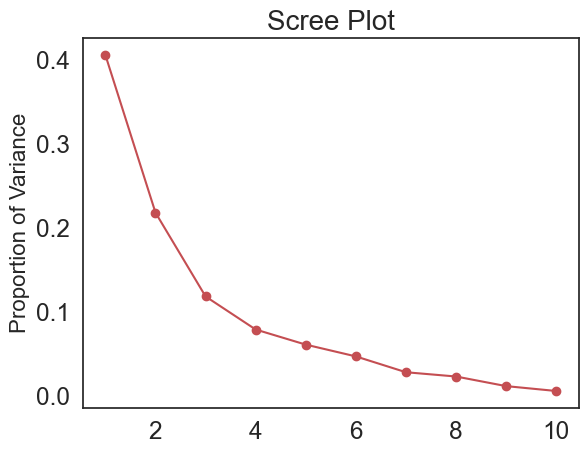

In [82]:
PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
         prop_var,
         'ro-')
plt.title('Scree Plot', fontsize=20)
plt.ylabel('Proportion of Variance', fontsize=16)
plt.show()

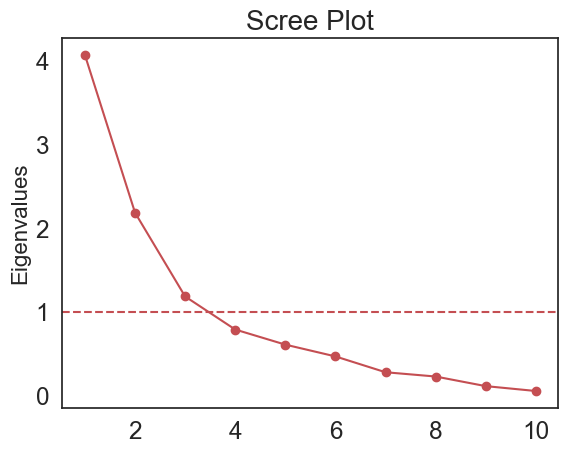

In [83]:
PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
         eigenvalues,
         'ro-')
plt.title('Scree Plot', fontsize=20)
plt.ylabel('Eigenvalues', fontsize=16)
plt.axhline(y=1, color='r', 
            linestyle='--')
plt.show()

# Production vs Education

In [84]:
df_merged.head()

,NutsID,region_name,NUTS2_region,secondary_plus_perc,non_family_perc,p.value_eur,p.area_ha,pc.area,pc.hold,pc.avg_area_hold,tc.area,tc.hold,tc.avg_area_hold
0,1111601,Arcos de Valdevez,Norte,18.55,7.28,11530051,551.5,613,1271,0.482,962,1142,0.842
1,1111602,Caminha,Norte,20.56,19.90,3015466,1058.6,73,228,0.320,300,291,1.031
2,1111603,Melgaço,Norte,26.19,10.32,5191947,494.9,719,746,0.964,96,347,0.277
3,1111604,Monção,Norte,25.64,12.14,9358899,1577.4,1725,1568,1.100,638,905,0.705
4,1111605,Paredes de Coura,Norte,18.44,5.84,5383718,1276.3,76,289,0.263,1265,588,2.151


In [85]:
df_prod_ed = df_merged[['NutsID', 'region_name', 'NUTS2_region', 'secondary_plus_perc', 'p.value_eur', 'p.area_ha']]
df_prod_ed.head()

,NutsID,region_name,NUTS2_region,secondary_plus_perc,p.value_eur,p.area_ha
0,1111601,Arcos de Valdevez,Norte,18.55,11530051,551.5
1,1111602,Caminha,Norte,20.56,3015466,1058.6
2,1111603,Melgaço,Norte,26.19,5191947,494.9
3,1111604,Monção,Norte,25.64,9358899,1577.4
4,1111605,Paredes de Coura,Norte,18.44,5383718,1276.3


<Axes: xlabel='p.area_ha', ylabel='secondary_plus_perc'>

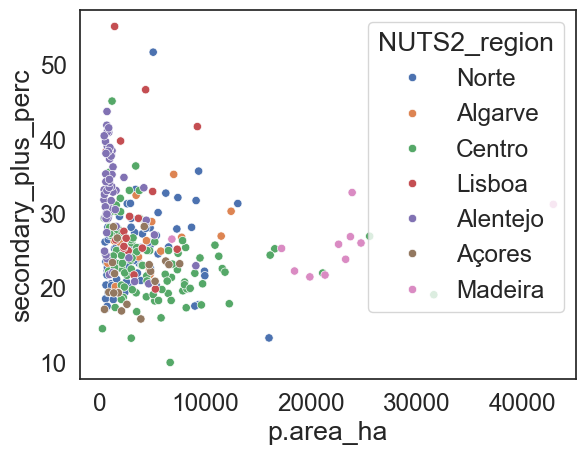

In [86]:
sns.scatterplot(
    data = df_prod_ed,
    x = 'p.area_ha',
    y = 'secondary_plus_perc',
    hue = 'NUTS2_region'
)

<Axes: xlabel='p.value_eur', ylabel='secondary_plus_perc'>

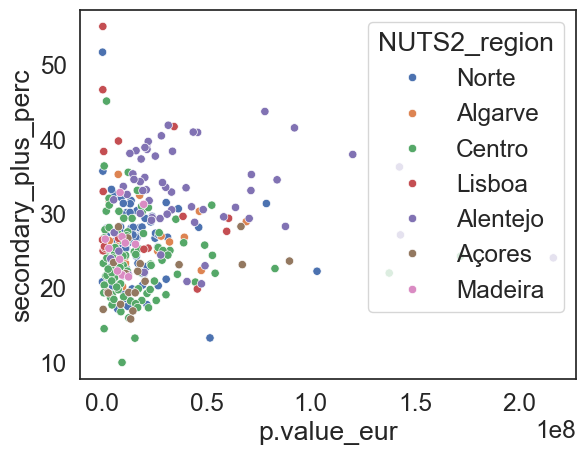

In [87]:
sns.scatterplot(
    data = df_prod_ed,
    x = 'p.value_eur',
    y = 'secondary_plus_perc',
    hue = 'NUTS2_region'
)

                             OLS Regression Results                            
Dep. Variable:     secondary_plus_perc   R-squared:                       0.031
Model:                             OLS   Adj. R-squared:                  0.028
Method:                  Least Squares   F-statistic:                     9.687
Date:                 Thu, 20 Jun 2024   Prob (F-statistic):            0.00203
Time:                         12:43:01   Log-Likelihood:                -1007.4
No. Observations:                  308   AIC:                             2019.
Df Residuals:                      306   BIC:                             2026.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.3730      0.469     58.33

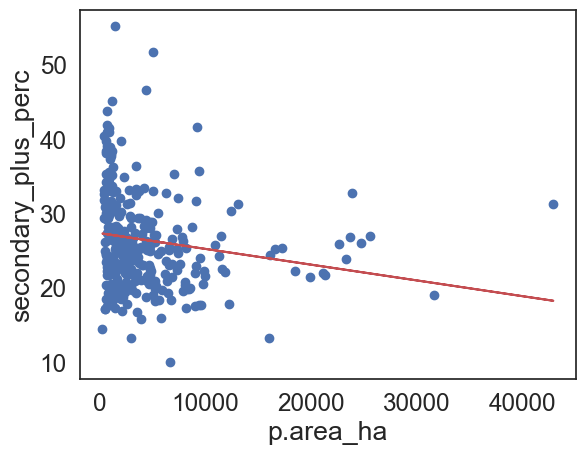

In [88]:
df_prod_ed_nona = df_prod_ed.dropna()

# Define the dependent variable (y) and independent variable (x)
y = df_prod_ed_nona['secondary_plus_perc']
x = df_prod_ed_nona['p.area_ha']

# Add a constant (intercept) to the independent variable
x = sm.add_constant(x)

# Perform linear regression
model = sm.OLS(y, x).fit()

# Print the regression summary
print(model.summary())

# Plot the regression line
plt.scatter(x.loc[:, 'p.area_ha'], y)  # scatter plot of data points
plt.xlabel('p.area_ha')
plt.ylabel('secondary_plus_perc')

# Plot the regression line
plt.plot(x.loc[:, 'p.area_ha'], model.fittedvalues, 'r')  # regression line

plt.show()

                             OLS Regression Results                            
Dep. Variable:     secondary_plus_perc   R-squared:                       0.019
Model:                             OLS   Adj. R-squared:                  0.016
Method:                  Least Squares   F-statistic:                     6.011
Date:                 Thu, 20 Jun 2024   Prob (F-statistic):             0.0148
Time:                         12:43:01   Log-Likelihood:                -1009.2
No. Observations:                  308   AIC:                             2022.
Df Residuals:                      306   BIC:                             2030.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          25.7170      0.473     54

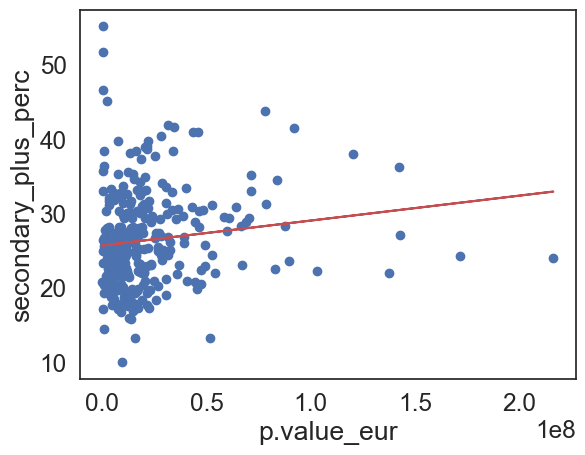

In [89]:
df_prod_ed_nona = df_prod_ed.dropna()

# Define the dependent variable (y) and independent variable (x)
y = df_prod_ed_nona['secondary_plus_perc']
x = df_prod_ed_nona['p.value_eur']

# Add a constant (intercept) to the independent variable
x = sm.add_constant(x)

# Perform linear regression
model = sm.OLS(y, x).fit()

# Print the regression summary
print(model.summary())

# Plot the regression line
plt.scatter(x.loc[:, 'p.value_eur'], y)  # scatter plot of data points
plt.xlabel('p.value_eur')
plt.ylabel('secondary_plus_perc')

# Plot the regression line
plt.plot(x.loc[:, 'p.value_eur'], model.fittedvalues, 'r')  # regression line

plt.show()